<a href="https://colab.research.google.com/github/HarimJung/Machine-Learning-Analytics/blob/master/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H3> 1. (회귀분석) 위 plot을 보면 mean radius와 mean area 두 특징 사이에는 양의 선형 상관 관계가 있는 것으로 추정된다. mean area를 목적변수, mean radius를 설명변수로 하는 선형 회귀 분석을 수행하고 회귀식을 (a) 수식 및 (b) 그림으로 나타내어보시오(즉, 1번에선 양성/악성 정보를 쓰지 않는다). (c) mean radius 값이 20일 때, mean area의 추정값을 계산해보시오. </H3>

In [0]:
import pandas as pd
import pystan
import seaborn as sns

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X0 = df['mean radius'].values.reshape(-1,1)
y = df['mean area'].values

model = LinearRegression().fit(X0, y)
print(model.coef_, model.intercept_)

[98.59821922] -738.0367041957495


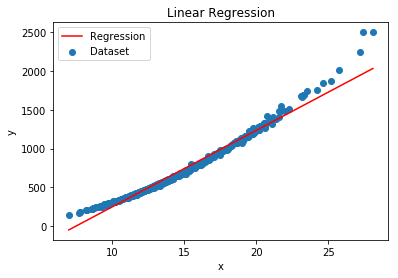

In [0]:
import statsmodels.api as sm

x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)
y_new = model.intercept_+model.coef_*x_new

plt.scatter(X0, y, label="Dataset")
plt.plot(x_new, np.ravel(y_new), 'r-', label="Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()


In [0]:
x_new = 20
y_new = model.intercept_+model.coef_*x_new
y_new

array([1233.92768011])

모범 답안:

(a) 회귀식: $\hat{y} = 98.598x -738.04$

(b) 위 그림과 같음

(c) 예측값: $1233.9$

<H3> 2. (분류) 위 plot을 보면 mean texture와 mean area 두 특징을 사용하면 클래스가 구분될 것으로 기대된다. (a) SVM 분류기(classifier)를 학습 후 결정 경계(decision boundary)를 표현해보시오. (b) RBF kernel + SVM의 수행 결과를 표현해보시오. </H3>

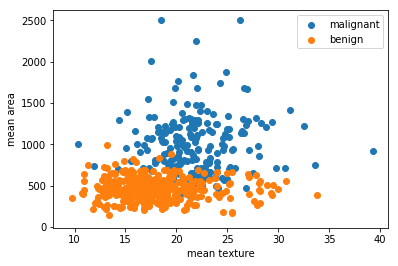

In [0]:
from sklearn.preprocessing import StandardScaler


X = df[['mean texture','mean area']].values
y = df['class']

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#엔코더를 해서, 두가지로 바꾸는것
labelencoder_X = LabelEncoder()
y = labelencoder_X.fit_transform(y)

mask = y == 1
adm = plt.scatter(X[mask,0], X[mask,1])
not_adm = plt.scatter(X[~mask,0], X[~mask,1])

## 레이블을 나눠서 따로 스캐터해주기.

plt.xlabel('mean texture')
plt.ylabel('mean area')
plt.legend((adm, not_adm), ('malignant', 'benign'))
plt.show()

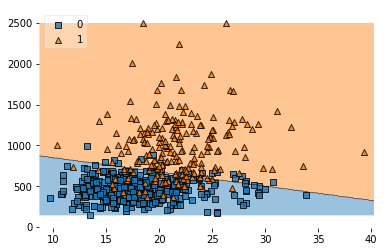

In [0]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
## 아예 트래인, 테스트를 나누지도 ㅇ않았어


model1 = SVC(kernel = 'linear', C = 1, random_state = 1).fit(X,y)
plot_decision_regions(X, y, clf = model1, legend = 2)
plt.show()

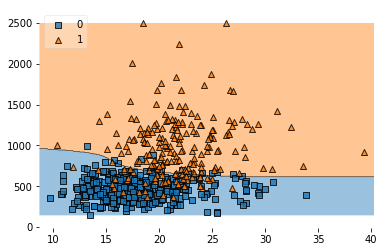

In [0]:
model2 = SVC(kernel = 'rbf', random_state = 1, gamma = 0.00001, C = 1e5).fit(X,y)
plot_decision_regions(X, y, clf = model2, legend = 2)
plt.show()

모범 답안:

(a) 위 그림과 같음

(b) 위 그림과 같음

<H3> 3. (차원 축소) 2번과 마찬가지로 mean texture, mean area 두 개의 feature만을 사용하여, 2차원에서 1차원으로 축소하는 PCA를 수행한 후 결과 좌표값을 나타내어보시오. 위 plot처럼 각 데이터 point마다 label 값을 색깔로 표현하여 보시오. </H3>

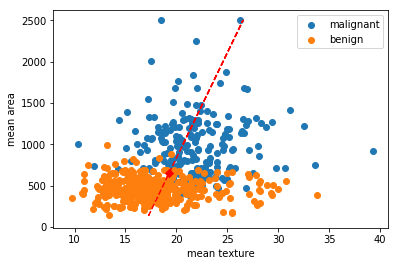

In [0]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

mask = y == 1
adm = plt.scatter(X[mask,0], X[mask,1])
not_adm = plt.scatter(X[~mask,0], X[~mask,1])
plt.xlabel('mean texture')
plt.ylabel('mean area')
plt.legend((adm, not_adm), ('malignant', 'benign'))

plt.plot(X2[:, 0], X2[:, 1], "r--", markersize=1) # 1st principal component
plt.plot(X[:, 0].mean(), X[:, 1].mean(), "r", markersize=5, marker="D") # center
plt.grid(False)
plt.xlabel("mean texture")
plt.ylabel("mean area")
plt.show()

모범 답안:

위 그림과 같음

<H3> 4. (비지도 학습) 2번과 마찬가지로 mean texture, mean area 두 개의 feature만을 사용하여 k-means 클러스터링을 수행하여 보시오. (a) k=2, (b) k=3일 때, 각각에 대한 결과를 그림으로 나타내어보시오. </H3>

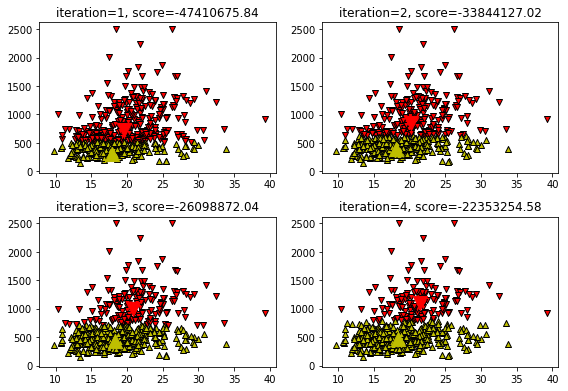

In [0]:
from sklearn.cluster import KMeans

# k-means 클러스터링 단계별 결과 확인(k=2)
def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

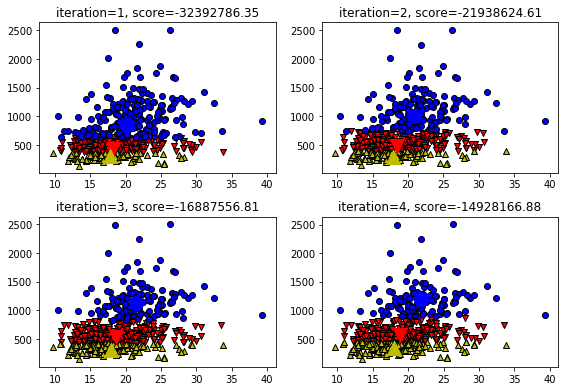

In [0]:
# k-means 클러스터링 단계별 결과 확인(k=3)
def plot_KMeans(n):
    model = KMeans(n_clusters=3, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], marker='o', facecolor='b', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.scatter(c2[0], c2[1], marker='o', c="b", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

모범 답안:

(a) 위 그림과 같음

(b) 위 그림과 같음

<H3> 5. (앙상블 기법) 배깅과 부스팅 각각에 대해 (a) 요약하여 설명하여 보시오. (b) 수업에서 배운 내용 이외의 앙상블 기법 아이디어를 한 가지 이상 자유롭게 제안하여 보시오. </H3>

모범 답안:

(a)

<b>배깅(Bagging)</b>: 학습 데이터로부터 부트스트랩 샘플링을 통해 서로 다른 학습 데이터를 추출하고, 각각의 부트스트랩 샘플에 대해 학습 알고리즘을 적용하여 서로 다른 분류기들을 생성 후 결과를 결합.

<b>부스팅(Boosting)</b>: 배깅의 변형으로, 분류기가 잘 예측하지 못하는 부분을 개선하기 위한 분류기. 이전 분류기들이 예측하지 못한 error 데이터에 가중치를 부여하여, 다음 분류기가 더 잘 예측하도록 함.

(b)

<b>앙상블 기법(Ensemble method)</b>: 수업에서는 주로 지도 학습에서의 앙상블 기법에 대해 설명하였다. 하지만 비지도 학습에 대해서도 앙상블 기법을 접목시킬 수 있다. 예를 들면, 클러스터링을 수행할 때, 무작위성(randomness)을 가지는 학습을 수차례 수행 후 나중에 취합(voting)하여 더 좋은 결과를 얻는 방식을 생각할 수 있다. k-means 클러스터링은 시작점(initial value)을 어떻게 정하느냐에 따라 결과가 달라지는 기계학습 알고리즘이다. 이를 여러 차례 수행한 후에, 서로 다른 두 data point들이 같은 클러스터로 배정되는 비율을 계산하여 '특정 값(threshold) 이상 같은 클러스터로 배정된 경우 최종적으로 같은 클러스터로 하고, 그렇지 않은 경우 다르게 한다'라는 기준으로 앙상블 기법을 활용한 비지도 학습을 수행 가능하다.